In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


In [2]:
train_df = pd.read_csv("input/train.csv")
test_df = pd.read_csv("input/test.csv")

In [3]:
train_df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [22]:
train_df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


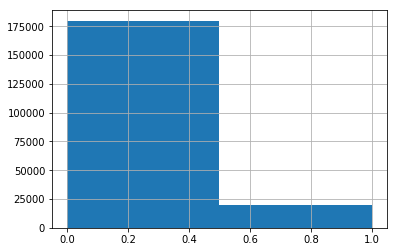

In [31]:
train_df["target"].hist(bins=2)

Data set contains 200 columns which has been somehow encoded. There is 200000 rows with no missing values. The target values are 0 and 1. The set is unbalanced - about 10 times more zeros than ones. It seems that set does not contains any categorical values. All values has at 4 decimal precision. As suggested in discussion on kaggle the data could be somehow encoded. Let investigate some of the variables which seemed to be valueable (based on previous kaggle kernels which looks somehow weird).

In [60]:
def divide_by_target(train_df,var_check):
    zeros =train_df.loc[train_df["target"]==0,var_check]
    ones = train_df.loc[train_df["target"]==1,var_check]
    full_set = train_df.loc[:,var_check]
    return zeros, ones,full_set

def print_desc(zeros,ones,full_set):
    print("zeros\n" , zeros.value_counts().describe())
    print("ones\n" ,ones.value_counts().describe())
    print("full_set\n",full_set.value_counts().describe())
    
def plot_hists(zeros,ones,full_set):
    ax,fig = plt.subplots(figsize=(16,7))
    plt.subplot(121)
    plt.title("histogram")
    h = plt.hist(zeros,bins=100,label="zeros")
    h = plt.hist(ones,bins=100,label="ones")
    plt.subplot(122)
    plt.title("kde")
    sns.distplot(zeros,hist=False,label="zeros")
    sns.distplot(ones,hist=False,label="ones")

In [63]:
zeros,ones,full_set = divide_by_target(train_df,"var_68")
print_desc(zeros,ones,full_set)

zeros
 count    447.000000
mean     402.465324
std      346.613447
min        1.000000
25%       82.000000
50%      296.000000
75%      774.000000
max      973.000000
Name: var_68, dtype: float64
ones
 count    393.000000
mean      51.139949
std       36.411806
min        1.000000
25%       18.000000
50%       43.000000
75%       88.000000
max      125.000000
Name: var_68, dtype: float64
full_set
 count     451.000000
mean      443.458980
std       384.610493
min         1.000000
25%        83.500000
50%       329.000000
75%       859.000000
max      1084.000000
Name: var_68, dtype: float64


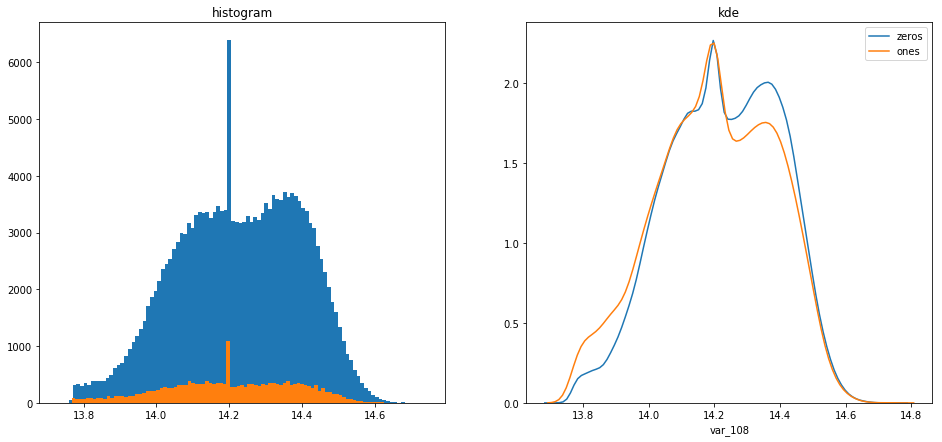

In [66]:
plot_hists(zeros,ones,full_set)

In [67]:
zeros,ones,full_set = divide_by_target(train_df,"var_108")
print_desc(zeros,ones,full_set )

zeros
 count    8485.000000
mean       21.202357
std        15.550580
min         1.000000
25%         7.000000
50%        23.000000
75%        32.000000
max       250.000000
Name: var_108, dtype: float64
ones
 count    6786.000000
mean        2.961686
std         2.613159
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        63.000000
Name: var_108, dtype: float64
full_set
 count    8525.000000
mean       23.460411
std        17.525365
min         1.000000
25%         8.000000
50%        25.000000
75%        36.000000
max       313.000000
Name: var_108, dtype: float64


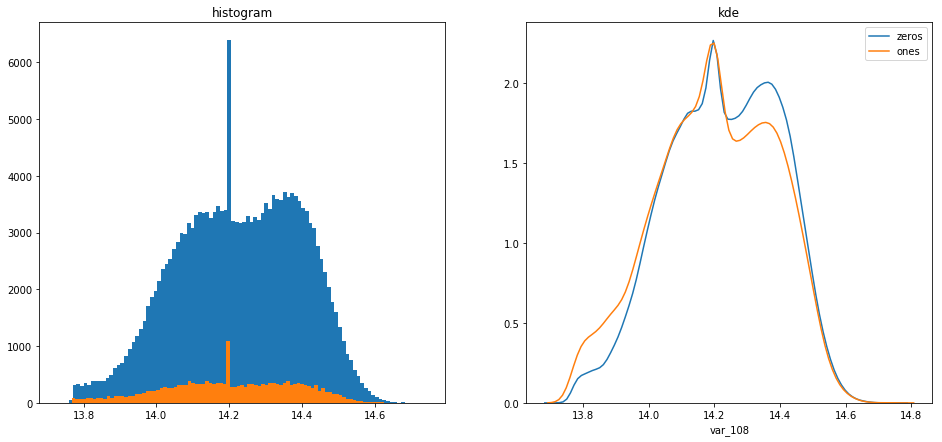

In [68]:
plot_hists(zeros,ones,full_set)

In [70]:
zeros,ones,full_set = divide_by_target(train_df,"var_12")
print_desc(zeros,ones,full_set )

zeros
 count    9507.000000
mean       18.923109
std        13.442206
min         1.000000
25%         6.000000
50%        18.000000
75%        30.000000
max       154.000000
Name: var_12, dtype: float64
ones
 count    7312.000000
mean        2.748632
std         2.106843
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        49.000000
Name: var_12, dtype: float64
full_set
 count    9561.000000
mean       20.918314
std        14.866495
min         1.000000
25%         7.000000
50%        20.000000
75%        33.000000
max       203.000000
Name: var_12, dtype: float64


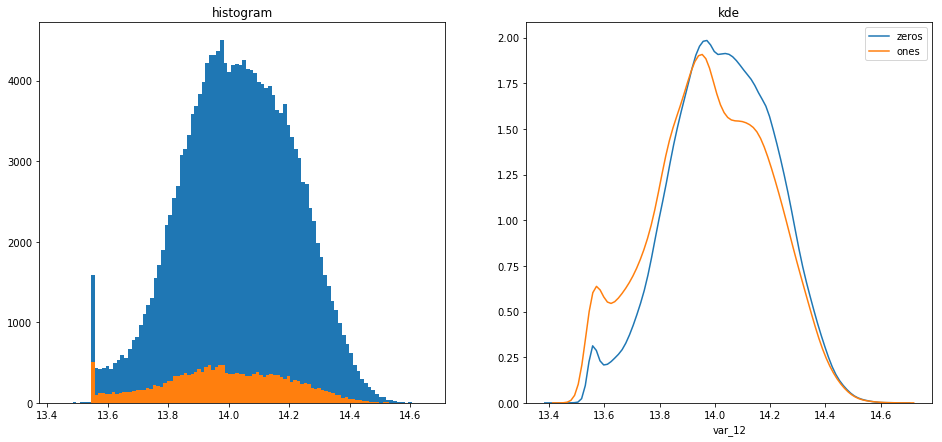

In [71]:
plot_hists(zeros,ones,full_set)

There are visible some peaks or weirdness. but kde is similiar to normal distributions. 

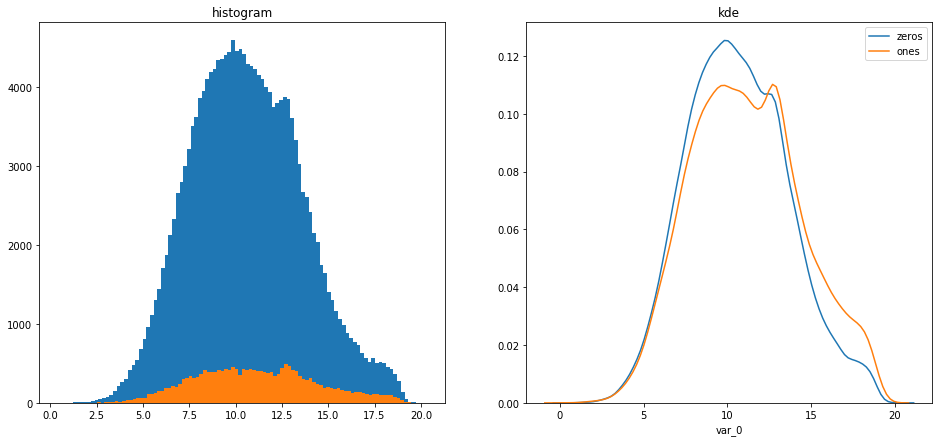

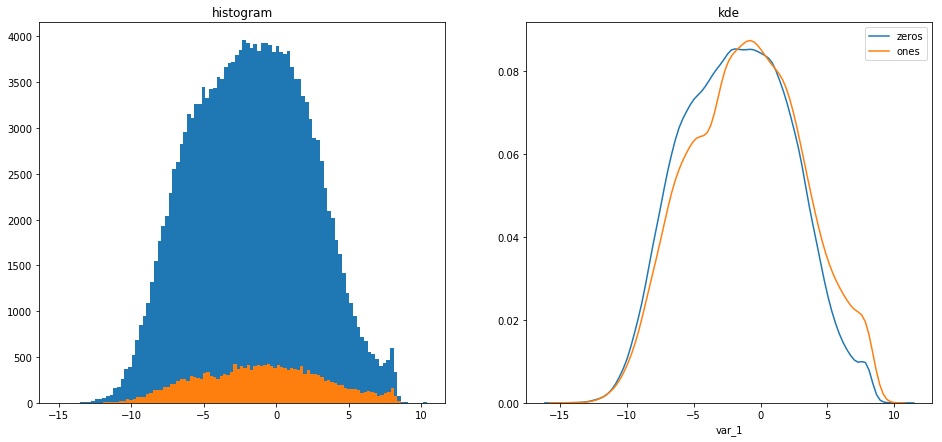

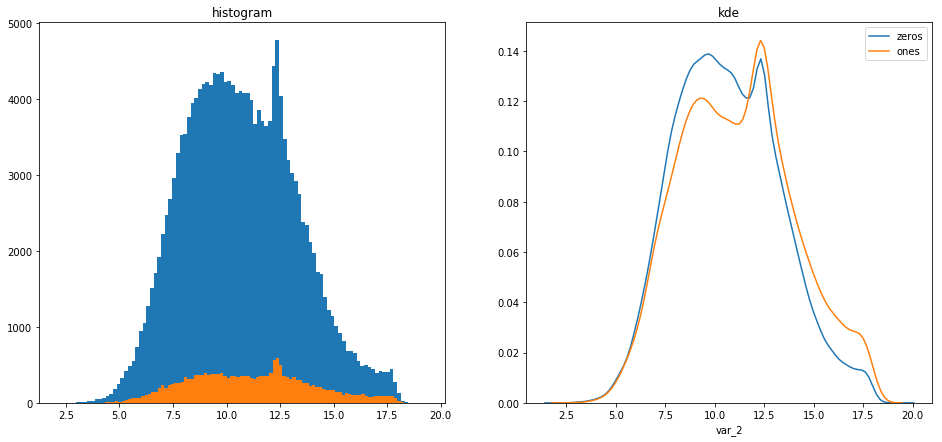

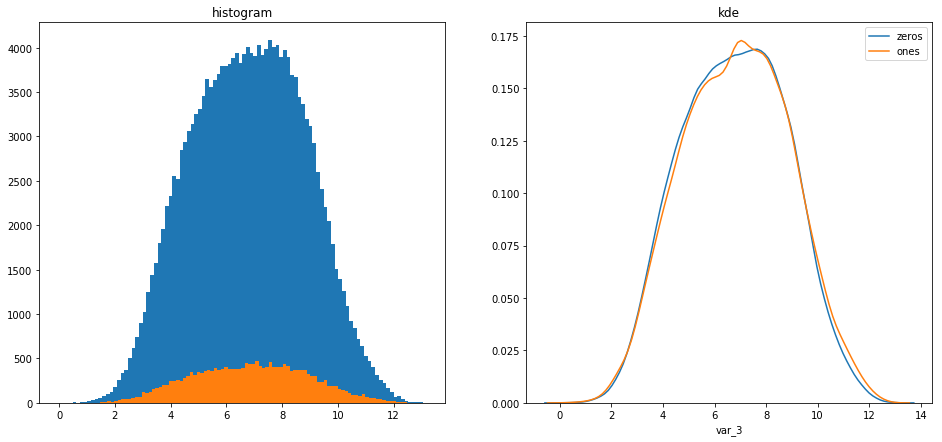

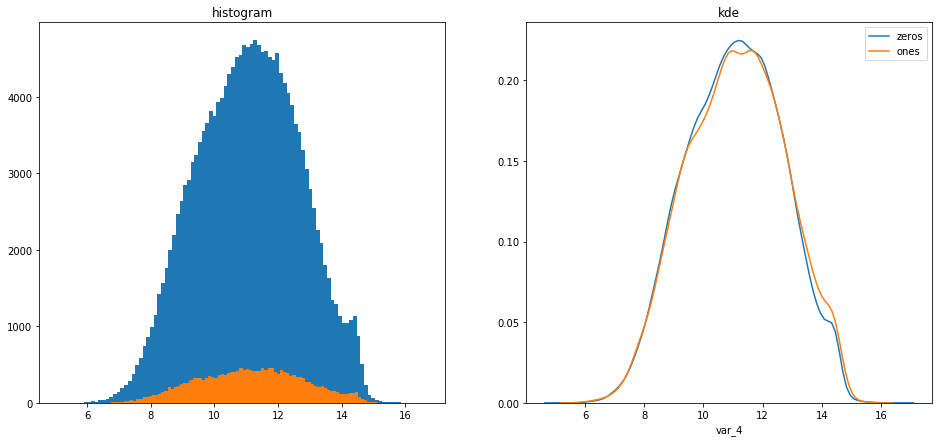

In [85]:
features = [c for c in train_df.columns if c not in ['ID_code', 'target']]
for feature in features[0:5]:
    zeros,ones,full_set = divide_by_target(train_df,feature)
    plot_hists(zeros,ones,full_set)

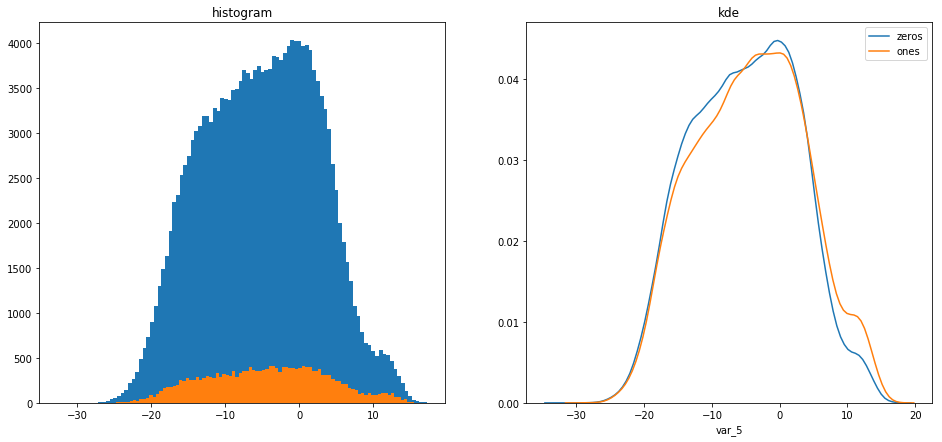

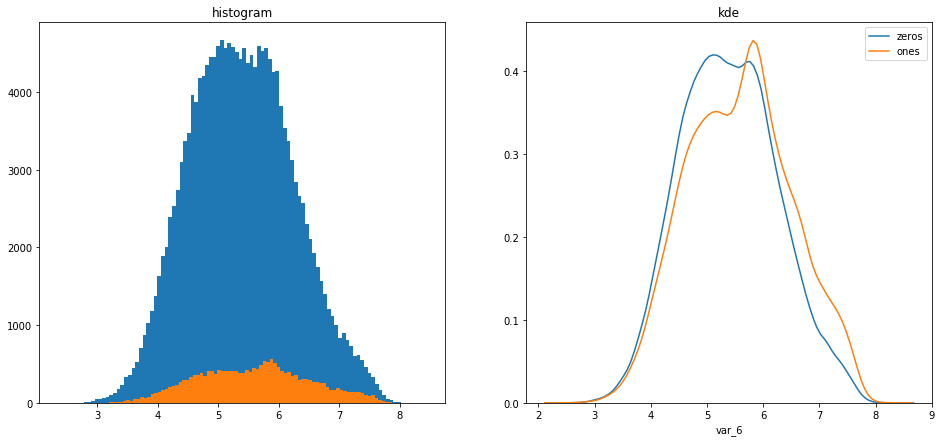

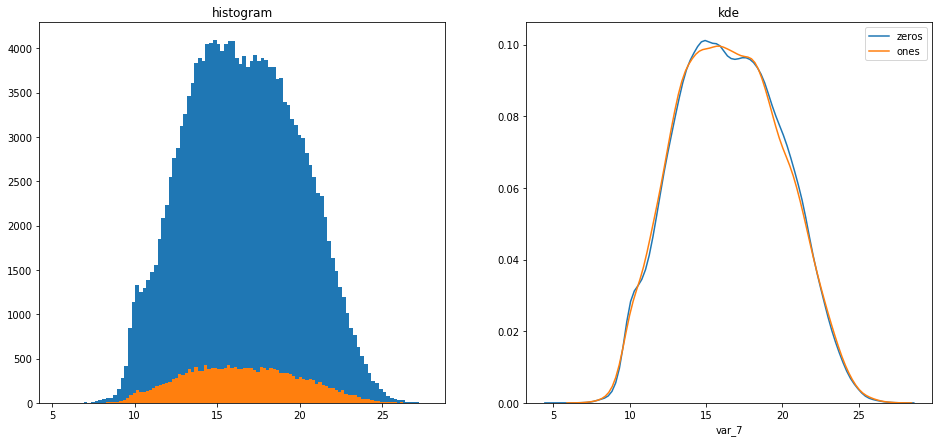

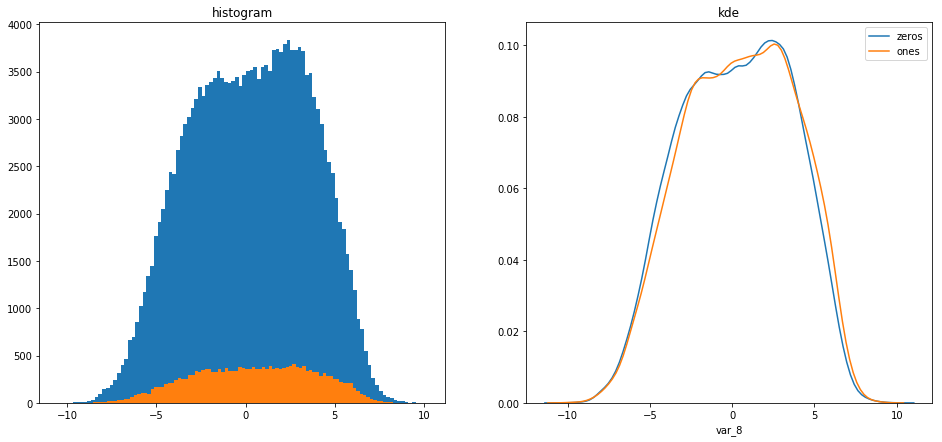

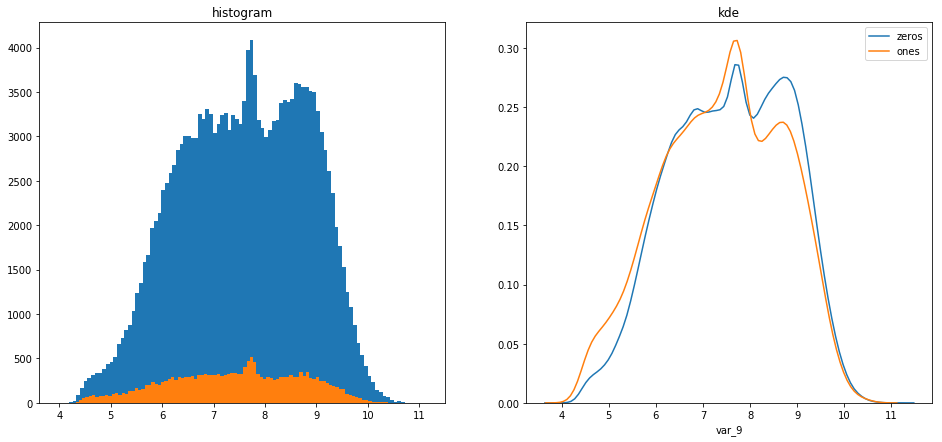

In [86]:
for feature in features[5:10]:
    zeros,ones,full_set = divide_by_target(train_df,feature)
    plot_hists(zeros,ones,full_set)

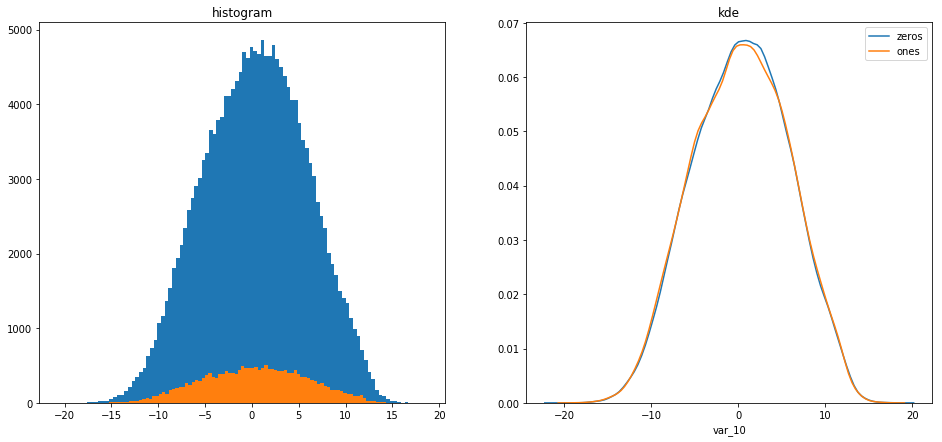

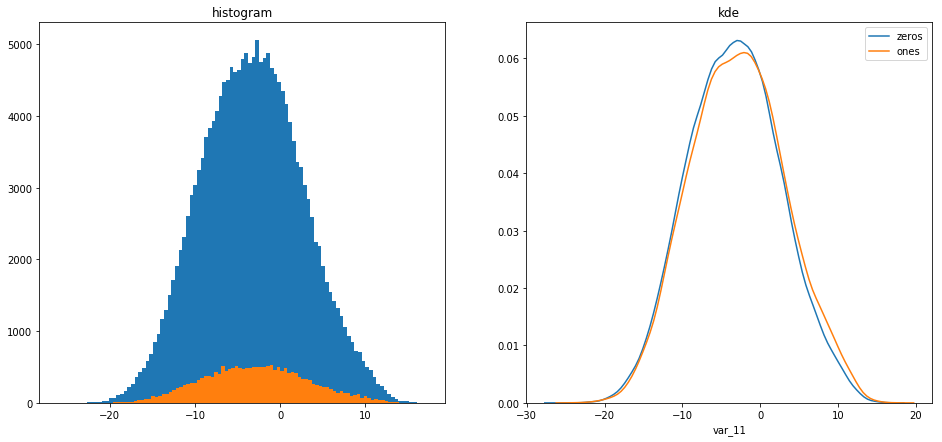

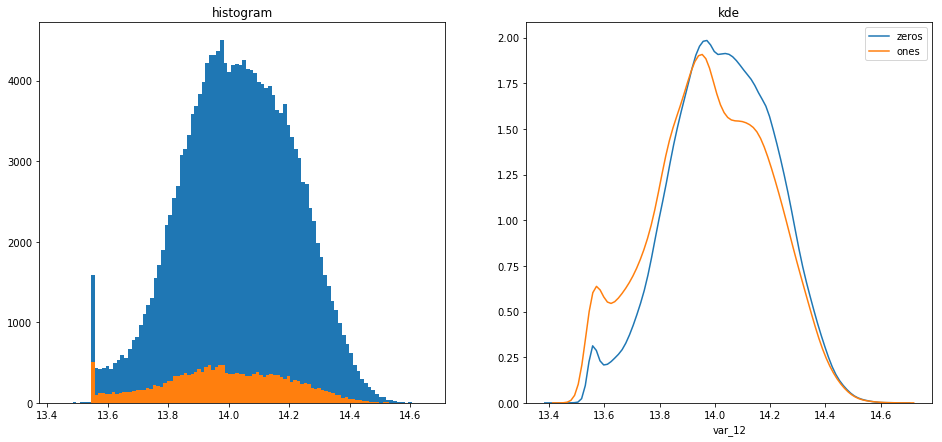

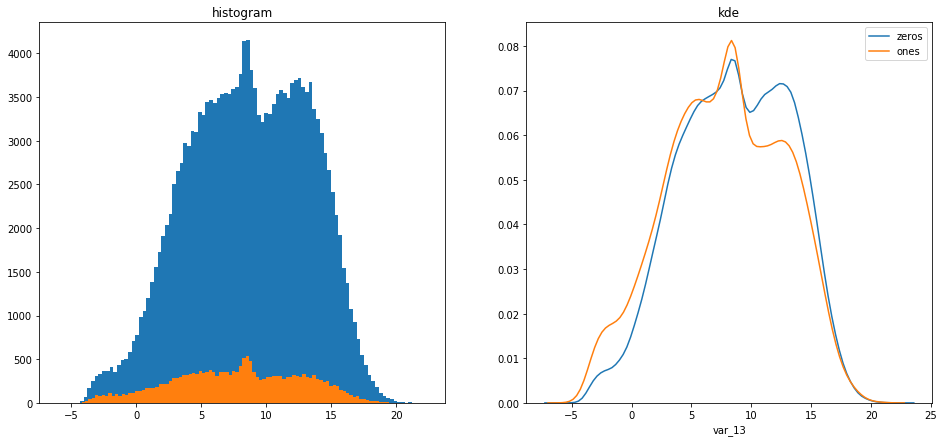

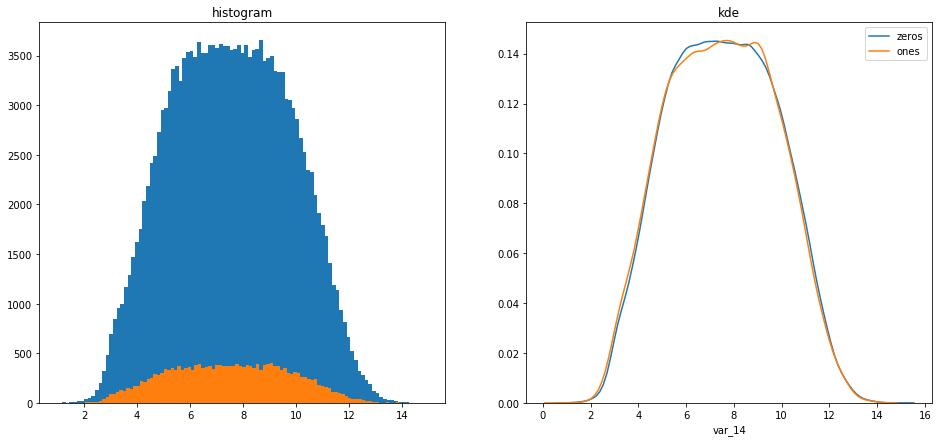

In [76]:
for featue in features[10:15]:
    zeros,ones,full_set = divide_by_target(train_df,featue)
    plot_hists(zeros,ones,full_set)

Maybe it will be also possible to see some correlations.

In [79]:
corr_matrix = train_df.corr()
corr_matrix

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,1.000000,0.052390,0.050343,0.055870,0.011055,0.010915,0.030979,6.673085e-02,-0.003025,0.019584,...,0.055973,0.047114,-0.042858,-0.017709,-0.022838,0.028285,0.023608,-0.035303,-0.053000,0.025434
var_0,0.052390,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,6.982549e-03,0.002429,0.004962,...,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,0.050343,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,3.257729e-03,0.001511,0.004098,...,0.006627,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.055870,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,8.825211e-04,-0.000991,0.002648,...,0.000197,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_3,0.011055,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-7.743892e-04,0.002500,0.003553,...,0.000151,0.002445,-0.001530,-0.001699,-0.001054,0.001206,-0.002800,0.001164,-0.001651,0.000506
var_4,0.010915,0.001326,0.000303,0.000723,-0.000322,1.000000,-0.001368,4.882529e-05,0.004549,0.001194,...,0.001514,0.004357,0.003347,0.000813,-0.000068,0.003706,0.000513,-0.000046,-0.001821,-0.000786
var_5,0.030979,0.003046,-0.000902,0.001569,0.003253,-0.001368,1.000000,2.587780e-03,-0.000995,0.000147,...,0.001466,-0.000022,0.001116,-0.002237,-0.002543,-0.001274,0.002880,-0.000535,-0.000953,0.002767
var_6,0.066731,0.006983,0.003258,0.000883,-0.000774,0.000049,0.002588,1.000000e+00,-0.002548,-0.001188,...,0.000721,0.005604,-0.002563,0.002464,-0.001141,0.001244,0.005378,-0.003565,-0.003025,0.006096
var_7,-0.003025,0.002429,0.001511,-0.000991,0.002500,0.004549,-0.000995,-2.547746e-03,1.000000,0.000814,...,-0.000337,-0.003957,0.001733,0.003219,-0.000270,0.001854,0.001045,0.003466,0.000650,-0.001457
var_8,0.019584,0.004962,0.004098,0.002648,0.003553,0.001194,0.000147,-1.187995e-03,0.000814,1.000000,...,0.002923,-0.001151,-0.000429,0.001414,0.001313,0.001396,-0.003242,-0.004583,0.002950,0.000854


In [84]:
(corr_matrix[corr_matrix!=1.0].max()).max()

0.06673084561268226

The highest correlation is not very high. Let see some scatters if there are some specific patterns we can see. Maybe columns are not correlated, but there are some pattern correlation missing.

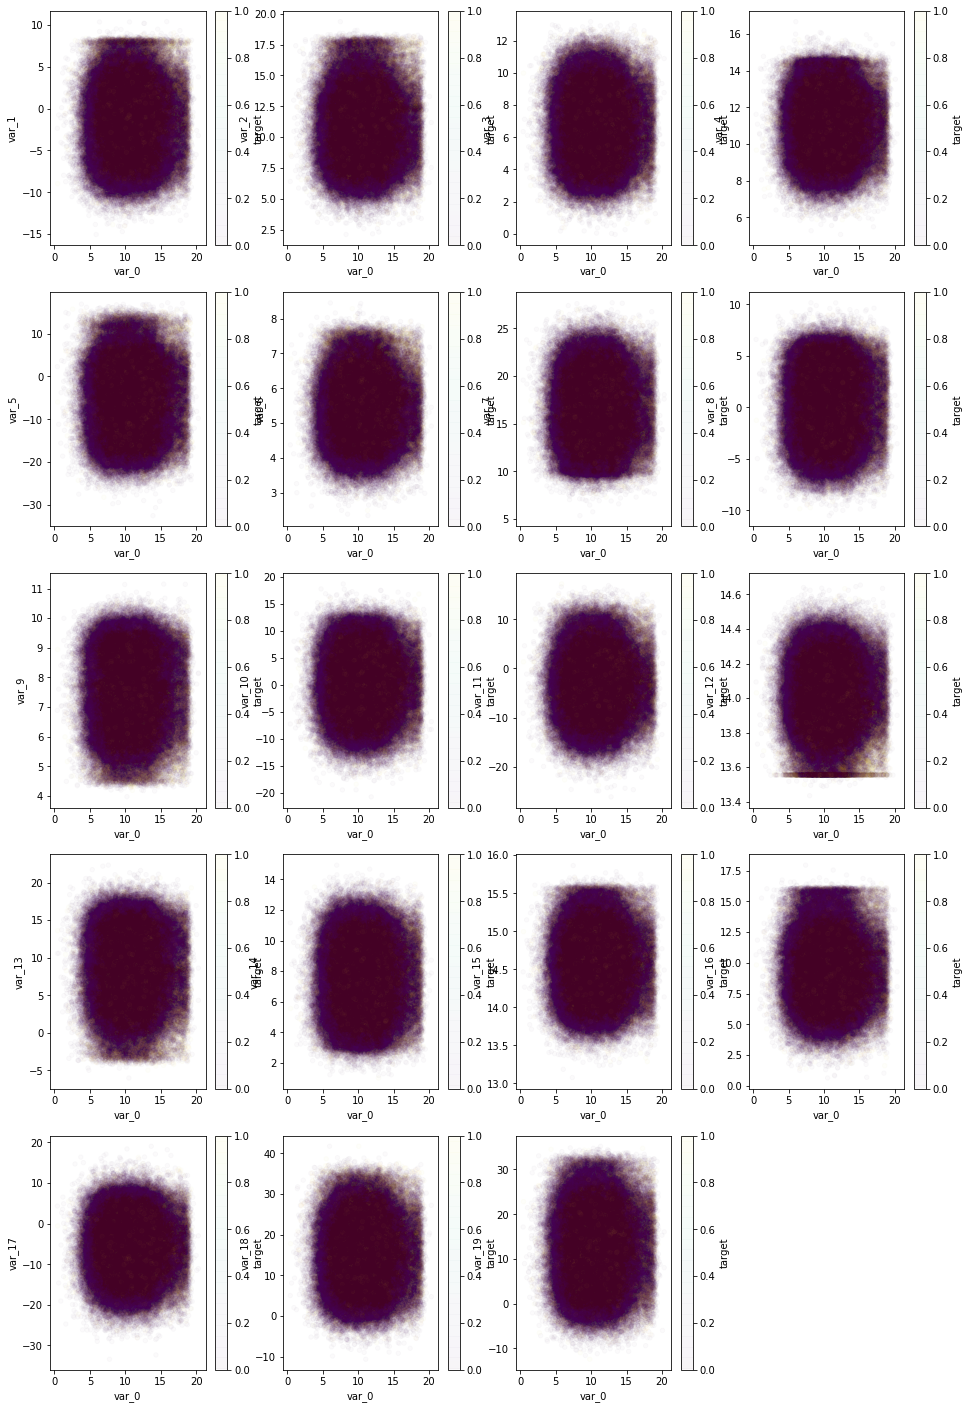

In [97]:
plt.subplots(figsize=(16,25))
for idx,feature in enumerate(features[1:20]):
    ax = plt.subplot(5,4,idx+1)
    train_df.plot(kind="scatter",x="var_0",y=feature,alpha=0.02,c="target",cmap="viridis",ax=ax)

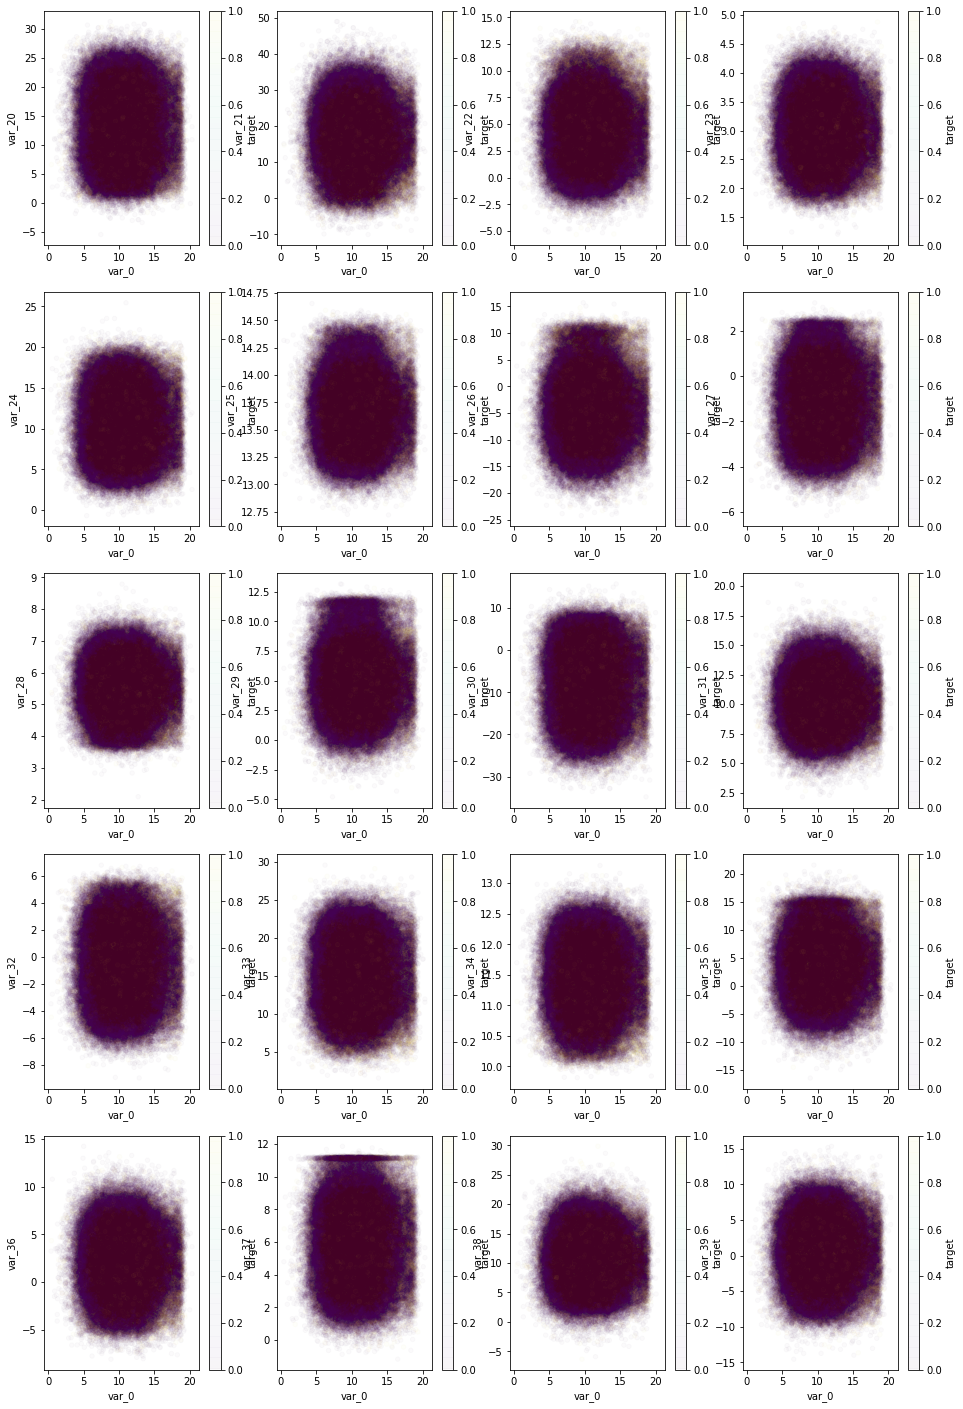

In [98]:
plt.subplots(figsize=(16,25))
for idx,feature in enumerate(features[20:40]):
    ax = plt.subplot(5,4,idx+1)
    train_df.plot(kind="scatter",x="var_0",y=feature,alpha=0.02,c="target",cmap="viridis",ax=ax)

There are visible some weird things like lines on some values (var_1 in in values about 7). This could be related to adding some noise on this value or maybe other signal. It is hard to say for sure what happened here.

Someone on kaggle pointed out that there are strange things with duplicates in dataset. Let see if there exists any weird things. It is good to know if there exist any duplicate values in rows. It would be strange if in two columns value (4 digits numbers) in the same rows exists two the same row. Compare some of the values to the generated normal distribution signal with mean and std from original signal.

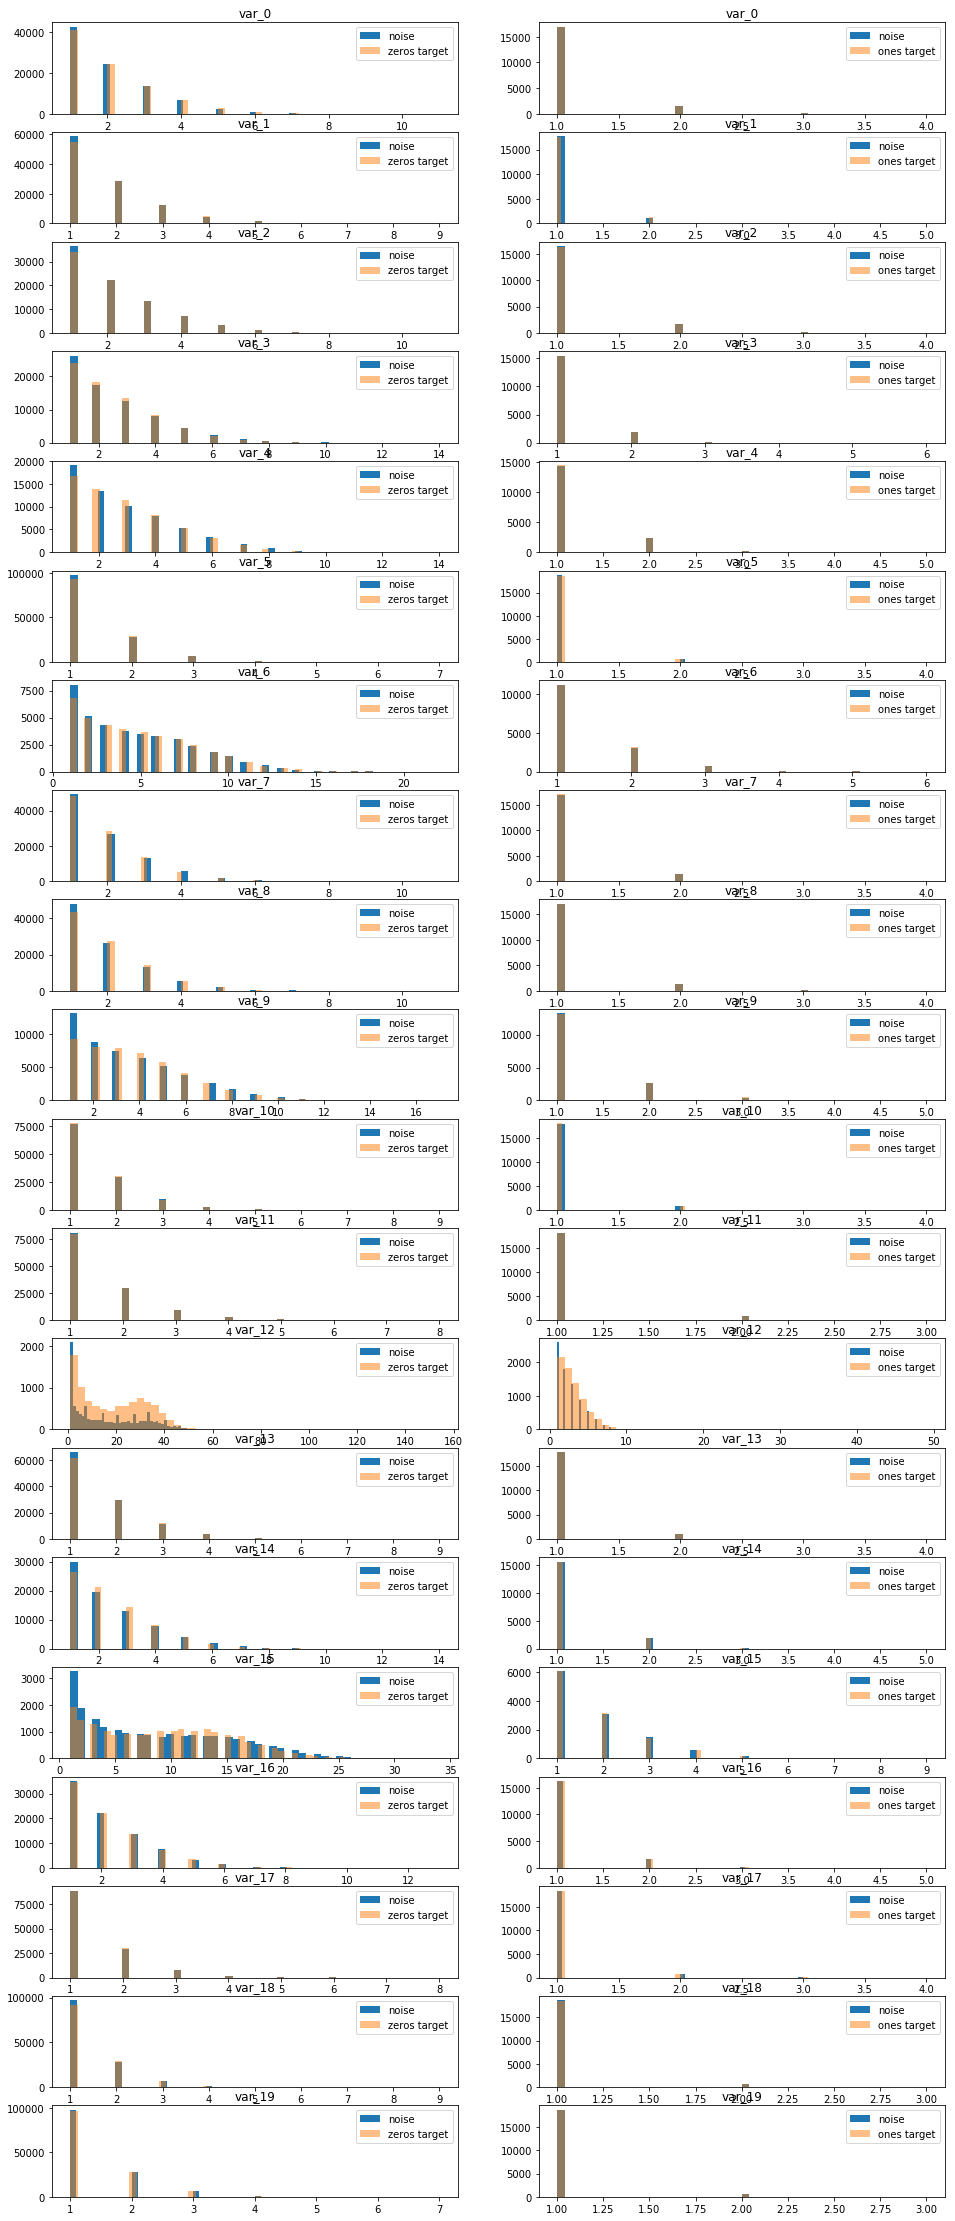

In [130]:
nr_bins=50
plt.figure(figsize=(16,40))
idx = 0
for feature in features[:20]:
    ax = plt.subplot(20,2,idx+1)
    
    zeros,ones,full_set = divide_by_target(train_df,feature)
    
    mu, sigma =  zeros.mean(),zeros.std() # mean and standard deviation
    s = np.random.normal(mu, sigma,zeros.count())
    
    plt.hist(pd.DataFrame(s).iloc[:,0].round(4).value_counts(),bins=nr_bins,label="noise")
    plt.hist(zeros.value_counts(),bins=nr_bins,alpha=0.5,label="zeros target")
    plt.title(feature)
    plt.legend()
    
    ax = plt.subplot(20,2,idx+2)
    
    mu, sigma =  ones.mean(),ones.std() # mean and standard deviation
    s = np.random.normal(mu, sigma,ones.count())
    
    plt.hist(pd.DataFrame(s).iloc[:,0].round(4).value_counts(),bins=nr_bins,label="noise")
    plt.hist(ones.value_counts(),bins=nr_bins,label="ones target",alpha=0.5)
    plt.title(feature)
    plt.legend()
    idx +=2
    


In some cases those values counts looks very different than generated noise. Gennerally for 4 decimal precision histogram should be similiar for the same number of generated values. 

In [131]:
duplicates_idx = []
duplicate_col = []
duplicate_val = []
for i in range(train_df.shape[0]):
    if i%10000==0:
        print(i)
    if train_df.iloc[i,:].duplicated().sum()>0:
        duplicates_idx.append(i)
        
        duplicated_row = train_df.iloc[i]
        duplicated_c = duplicated_row[duplicated_row.duplicated(keep=False)].index
        duplicated_v = duplicated_row[duplicated_row.duplicated(keep=False)].values
        duplicate_col.append(duplicated_c)
        duplicate_val.append(duplicated_v)
        

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000


In [77]:
print("there are : {} duplicates".format(len(duplicates_idx)))

there are : 12975 duplicates


It seems strange that there exists nearly 13k rows with duplicates values in columns.Let's look closer into that.

In [19]:
duplicate_val[0:5]

[array([16.4421, 16.4421], dtype=object),
 array([13.8222, 13.8222], dtype=object),
 array([13.972000000000001, 13.972000000000001], dtype=object),
 array([18.6714, 18.6714], dtype=object),
 array([3.1413, 3.1413], dtype=object)]

In [18]:
duplicate_col[0:5]

[Index(['var_109', 'var_153'], dtype='object'),
 Index(['var_31', 'var_104'], dtype='object'),
 Index(['var_12', 'var_81'], dtype='object'),
 Index(['var_33', 'var_92'], dtype='object'),
 Index(['var_23', 'var_64'], dtype='object')]

It doesn't seeem that those value has any particular pattern visible, like some columns appears more often than others. I will try to try to use the information above to train increase model's score.